<a href="https://colab.research.google.com/github/karllasouzza/Deep-Learning-Pytorch/blob/main/Ativa%C3%A7%C3%B5es_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.random.seed(46)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

-2.8


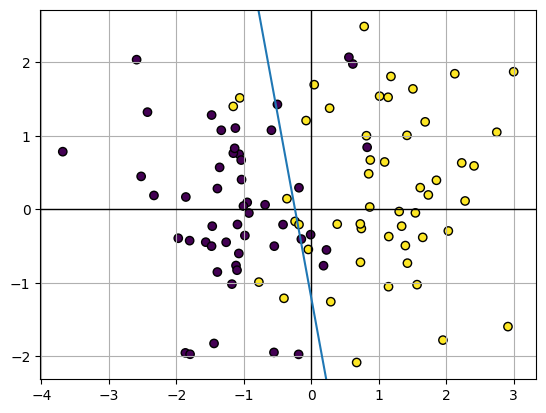

In [18]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:,1], marker='o', c=Y, edgecolor='k')

  # fixa o grafico na distribuição
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0,-2,4, color='k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1 #b
b = 1.2 #c

plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] +  b)

In [8]:
# Camada Linear

perceptron = nn.Linear(2, 1)

In [7]:
# ativação sigmoide

sigmoide = nn.Sigmoid()

In [19]:
perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

In [12]:
print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[5., 1.]])
tensor([-0.4000])


In [25]:
activation = nn.ReLU()
# activation = nn.Tanh()

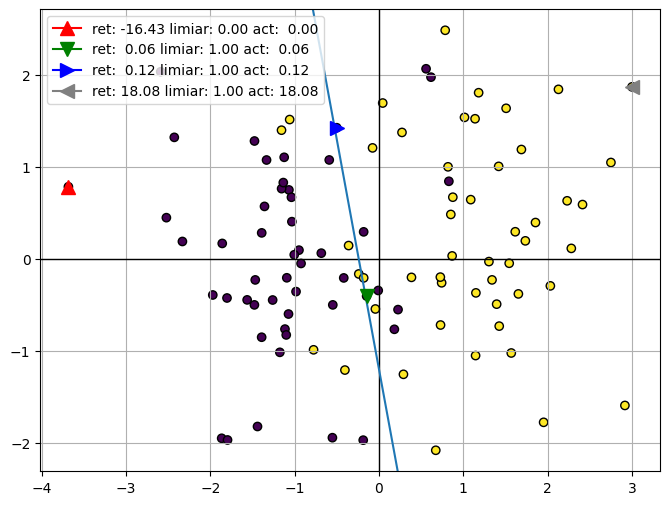

In [26]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = activation(ret)

  act_limiar = 0 if ret < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()